In [3]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import torch
from transformers import Trainer, TrainingArguments

In [6]:
train = pd.read_csv("train.csv").set_index("train_idx")
test = pd.read_csv("test.csv").set_index("test_idx")

In [7]:
train.head()

,text,label,label_text
train_idx,,,
0,i really do recommend this to anyone in need o...,1,positive
1,very good every day camera fits nicely in the ...,1,positive
2,"but , dollar for dollar , this dvd player is p...",1,positive
3,i got this phone yesterday and didn ' t find a...,1,positive
4,1 ) price gb of storage,1,positive


In [8]:
test.head()

,text
test_idx,
0,fm receiver it has none
1,"the picture quality surprised me , when i firs..."
2,great video clip quality for a digital camera ...
3,creative did well on its rechargeable battery ...
4,i highly recommend this camera to anyone looki...


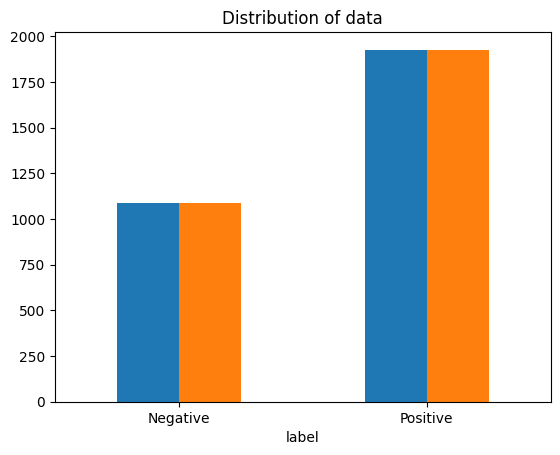

In [9]:
# Plotting the distribution for dataset.

ax = train.groupby('label').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

text, sentiment = list(train['text']), list(train['label'])


In [10]:
lista = []
for text in train["text"]:
  lista.append(len(text.split(" ")))

lista = np.array(lista)
print(lista.max(), lista.mean(), lista.min())

lista = []
for text in test["text"]:
  lista.append(len(text.split(" ")))

lista = np.array(lista)
print(lista.max(), lista.mean(), lista.min())

95 18.963196286472147 1
105 19.751989389920425 2


In [11]:
# converting labels and tweet to list
labels = train['label'].tolist()
text = train['text'].tolist()

In [12]:
# HerBERT
# from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

# tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
# model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

In [13]:
# ALBERT
# from transformers import AutoTokenizer, AlbertForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("textattack/albert-base-v2-imdb")
# model = AlbertForSequenceClassification.from_pretrained("textattack/albert-base-v2-imdb", num_labels=2)

In [14]:
# BART
# from transformers import AutoTokenizer, BartForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("valhalla/bart-large-sst2")
# model = BartForSequenceClassification.from_pretrained("valhalla/bart-large-sst2", num_labels=2)

In [15]:
# BERT
# from transformers import AutoTokenizer, BertForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-yelp-polarity")
# model = BertForSequenceClassification.from_pretrained("textattack/bert-base-uncased-yelp-polarity", num_labels=2)

In [16]:
# Big Bird
# from transformers import AutoTokenizer, BigBirdForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("l-yohai/bigbird-roberta-base-mnli")
# model = BigBirdForSequenceClassification.from_pretrained("l-yohai/bigbird-roberta-base-mnli")

In [17]:
# Big Bird Pegasus
# NO SE PUEDE PORQUE NO HAY SUFICIENTE MEMORIA
# from transformers import AutoTokenizer, BigBirdPegasusForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("google/bigbird-pegasus-large-arxiv")
# model = BigBirdPegasusForSequenceClassification.from_pretrained("google/bigbird-pegasus-large-arxiv", num_labels=2)

In [18]:
# BLOOM
# from transformers import AutoTokenizer, BloomForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
# model = BloomForSequenceClassification.from_pretrained("bigscience/bloom-560m", num_labels=2)

In [19]:
# CamenBERT
from transformers import AutoTokenizer, CamembertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
model = CamembertForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

You are using a model of type roberta to instantiate a model of type camembert. This is not supported for all configurations of models and can yield errors.


In [20]:
#padding and truncation of data
inputs = tokenizer(text, padding="max_length", truncation=True, max_length = 110)

In [21]:
import torch

class sentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = sentimentDataset(inputs, labels)

In [22]:
train_dataset.__getitem__(3)

{'input_ids': tensor([   0,  118,  300,   42, 1028, 2350,    8,  399,  128,  326,  465,  143,
         1272,   19,   24,  648,    2,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [23]:
#!pip install numba
#!pip install cudatoolkit

In [24]:
torch.cuda.is_available()

True

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device) #connecting model to gpu

cuda:0


CamembertForSequenceClassification(
  (roberta): CamembertModel(
    (embeddings): CamembertEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): CamembertEncoder(
      (layer): ModuleList(
        (0-11): 12 x CamembertLayer(
          (attention): CamembertAttention(
            (self): CamembertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): CamembertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=Tru

In [26]:
from transformers import Trainer, TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    logging_dir='./logs',
    logging_steps=10,
    metric_for_best_model="f1",
    #warmup_steps=500,
    #weight_decay=0.01,   
)
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset
)

trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
10,0.507300
20,0.286100
30,0.369600
40,0.351900
50,0.223500
60,0.492100
70,0.428900
80,0.261300
90,0.233100
100,0.286000


TrainOutput(global_step=5670, training_loss=0.030324249449656462, metrics={'train_runtime': 1832.2526, 'train_samples_per_second': 49.382, 'train_steps_per_second': 3.095, 'total_flos': 5114724094022400.0, 'train_loss': 0.030324249449656462, 'epoch': 30.0})

In [27]:
l2 = []
for i in test['text']:
    test_encoding = tokenizer(i, truncation=True, padding=True, max_length = 110, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**test_encoding)
    y = np.argmax(outputs[0].to('cpu').numpy())
    l2.append(y)

In [28]:
import json
diccionario = {}
for i in test.index:
    diccionario[i] = int(l2[i])
# Data to be written
json_entrega = {
    "target": diccionario
}
# Serializing json
json_object = json.dumps(json_entrega, indent=4)

# Writing to sample.json
with open("entrega.json", "w") as outfile:
    outfile.write(json_object)